# TorchSDE + Neuromancer: Basic (Explicit) Integration of Stochastic Differential Equations

This notebook goes over how to utilize torchsde's functionality within Neuromancer framework. This notebook is based off: https://github.com/google-research/torchsde/blob/master/examples/demo.ipynb




### Imports

If necessary, install torchsde library

In [1]:
#!pip install torchsde

In [2]:
import torch
from neuromancer.psl import plot
from neuromancer import psl
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from neuromancer.system import Node, System
from neuromancer.dynamics import integrators, ode
from neuromancer.trainer import Trainer
from neuromancer.problem import Problem
from neuromancer.loggers import BasicLogger
from neuromancer.dataset import DictDataset
from neuromancer.constraint import variable
from neuromancer.loss import PenaltyLoss
from neuromancer.modules import blocks

torch.manual_seed(0)


### Dataset: 
Below we generate some data. We assume the process has a state size of 1, batch size of 5 and 100 timesteps. 

In [3]:
batch_size, state_size, t_size = 5, 1, 100

ts = torch.linspace(0, 1, t_size)
y0 = torch.full(size=(batch_size, state_size), fill_value=0.1)
y0.shape
my_data = {'y': y0, 't':ts}

Strongly recommended to refer to TorchSDE documentation. For the basic/explicit SDE case, TorchSDE requires user to define the drift (f) and diffusion (g) functions. We define an example f and g below: 

In [6]:
def f(t, y):
    return torch.sin(t) + 0.1 * y
    
def g(t, y):
    return 0.3 * torch.sigmoid(torch.cos(t) * torch.exp(-y))

### Neuromancer Integration: 
Now define Neuromancer variables and components

In [7]:
t = variable('t')
y = variable('y')
block = blocks.BasicSDE(f, g, t, y) #We use this block for the basic/explicit SDE case where f and g are defined 
integrator = integrators.BasicSDEIntegrator(block) #instantiate integrator for the basic/explicit case 
model = Node(integrator, input_keys=['y','t'], output_keys=['ys']) #define Neuromancer Node to wrap integrator. Output of the 

In [8]:
output = model(my_data)
output

{'ys': tensor([[[ 0.1000],
          [ 0.1000],
          [ 0.1000],
          [ 0.1000],
          [ 0.1000]],
 
         [[ 0.1080],
          [ 0.1097],
          [ 0.1213],
          [ 0.1378],
          [ 0.0652]],
 
         [[ 0.1081],
          [ 0.1088],
          [ 0.1044],
          [ 0.1320],
          [ 0.0313]],
 
         [[ 0.0973],
          [ 0.1383],
          [ 0.0928],
          [ 0.1080],
          [ 0.0450]],
 
         [[ 0.0552],
          [ 0.1100],
          [ 0.0815],
          [ 0.0922],
          [ 0.0247]],
 
         [[ 0.0356],
          [ 0.0934],
          [ 0.1135],
          [ 0.0769],
          [ 0.0626]],
 
         [[ 0.0318],
          [ 0.0799],
          [ 0.0993],
          [ 0.0476],
          [ 0.0710]],
 
         [[ 0.0126],
          [ 0.0761],
          [ 0.1008],
          [ 0.0193],
          [ 0.0683]],
 
         [[ 0.0350],
          [ 0.0940],
          [ 0.1324],
          [ 0.0348],
          [ 0.0766]],
 
         [[-0.0037],
 

### Visualization 
Visualize ys which represents ts number of samples from a stochasic process parameterized by f and g for the provided batch_size

In [4]:
# Plotting helper function
def plot(ts, samples, xlabel, ylabel, title=''):
    ts = ts.cpu()
    samples = samples.squeeze().t().cpu()
    plt.figure()
    for i, sample in enumerate(samples):
        plt.plot(ts, sample, marker='x', label=f'sample {i}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

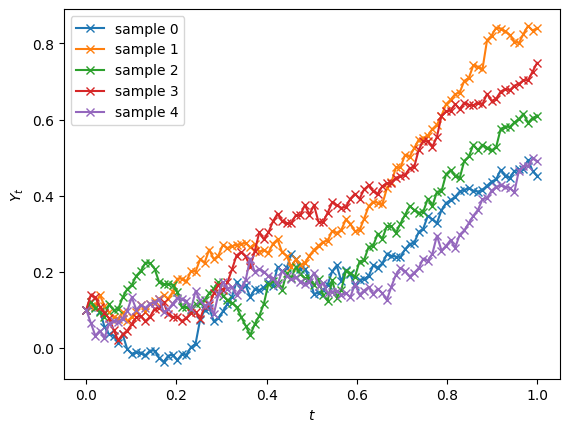

In [9]:
ys = output['ys']
plot(ts, ys, xlabel='$t$', ylabel='$Y_t$')